Importing the Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [ ]:
# Loading the data and csv file into a pandas dataframe

car_dataset = pd.read_csv("/content/car data.csv")

In [ ]:
# Inspecting the first 5 rows of a dataset

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Inspecting the last 5 rows of the dataset

car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
# Checking the Number of rows and Columns

car_dataset.shape

(301, 9)

In [ ]:
# Getting some information about the dataset

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Checking the number of missing values

car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
# Checking the Distribution of Categorical data

print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


**Encoding the Categorical Data**

ML Model Cannot understand the Alphabets so we convert categorical data into numberical format, for ex. in Fuel Type : Diesel - 0, Petrol - 1, CNG - 2 & in Seller_type : Dealer - 0, Individual - 1, and So On.....

In [ ]:
car_dataset.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2}}, inplace=True)
car_dataset.replace({'Seller_Type' : {'Dealer' : 0, 'Individual' : 1}}, inplace=True)
car_dataset.replace({'Transmission' : {'Manual' : 0, 'Automatic' : 1}}, inplace=True)

/tmp/ipython-input-1386606364.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Transmission' : {'Manual' : 0, 'Automatic' : 1}}, inplace=True)


In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the Data into Trainning and Testing Data

We have to predict the Car Price so selling Price will become our TARGET and We will store it in Y and Rest all in X

In [15]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = car_dataset['Selling_Price']

In [16]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [17]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Testing Data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

**Model Training**

1.   Linear Regression



In [21]:
# import the linear regression model
lin_reg_model = LinearRegression()

In [22]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [25]:
# Prediction on Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [26]:
# Error Evaluation

error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493711


Visualize the Actual Prices and Predict the Prices

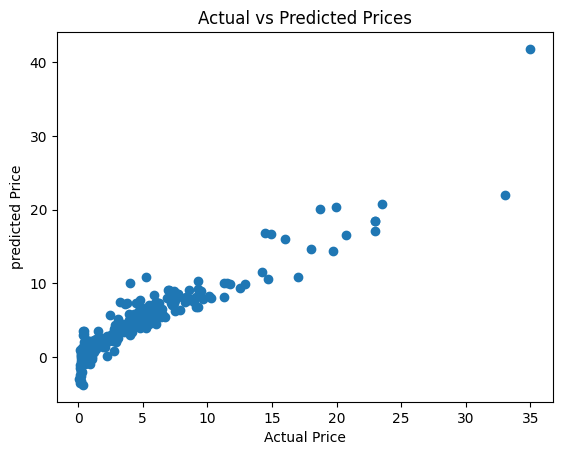

In [28]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [29]:
# Prediction on Test Data
test_data_prediction = lin_reg_model.predict(X_test)

In [30]:
# Error Value

error = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error)

R squared Error :  0.8365766715027051


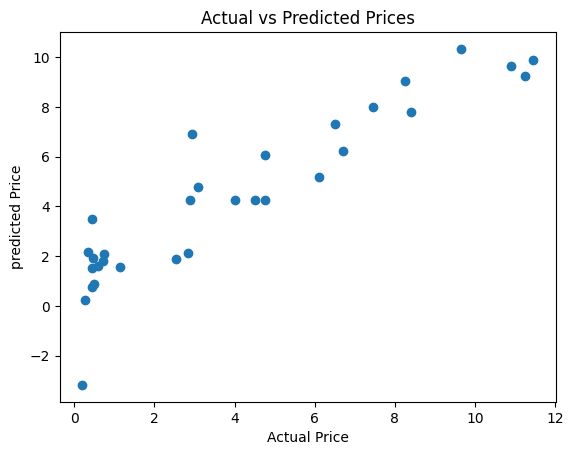

In [32]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

**LASSO REGRESSION MODEL**

In [34]:
lasso_reg_model = Lasso()

In [35]:
lasso_reg_model.fit(X_train, Y_train)

Lasso()

Model Evaluation

In [40]:
# Prediction on Training Data
lasso_training_data_prediction = lasso_reg_model.predict(X_train)

In [41]:
# Error Evaluation

las_error_score = metrics.r2_score(Y_train, lasso_training_data_prediction)
print("R squared Error : ", las_error_score)

R squared Error :  0.8427856123435794


Visualize the Actual Prices and Predict the Prices

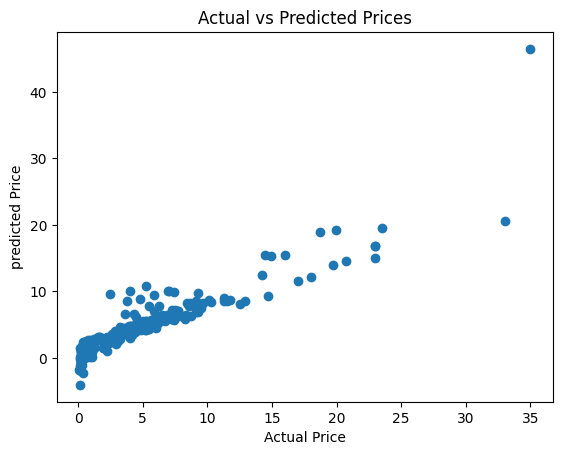

In [42]:
plt.scatter(Y_train, lasso_training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [43]:
# Prediction on Test Data
las_test_data_prediction = lasso_reg_model.predict(X_test)

In [44]:
# Error Value

las_error = metrics.r2_score(Y_test, las_test_data_prediction)
print("R squared Error : ", las_error)

R squared Error :  0.8709167941173195


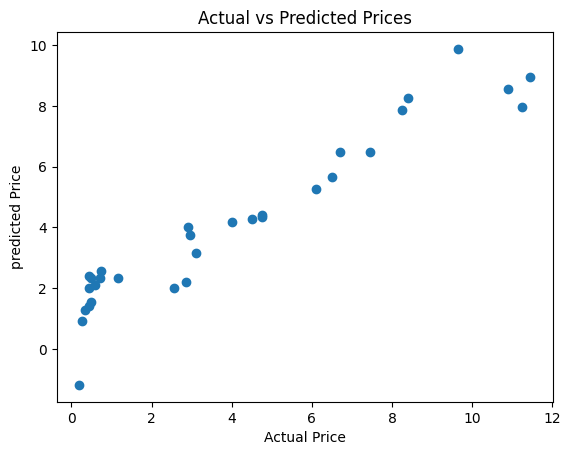

In [45]:
plt.scatter(Y_test, las_test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()